In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# 定义微分方程组
def system(t, y, a, b, n, theta1, theta2, beta1, beta2, delta_E, delta_R, m, rho, gamma, S_E, S_R):
    C, E, R = y
    # 微分方程组
    dC_dt = a * C * (1 - C / b) - n * C * E / (1 + theta1 * R / E)
    dE_dt = S_E + beta1 * E * C / (1 + theta2 * R) - delta_E * E - m * E * C - rho * E
    dR_dt = S_R + beta2 * R * C * E / (gamma + E) - delta_R * R + rho * E
    return [dC_dt, dE_dt, dR_dt]


In [3]:
# 初始条件（可调节）
C0 = 1.0
E0 = 0.5
R0 = 0.3
y0 = [C0, E0, R0]  # 初始条件数组

# 参数（可调节）
a = 0.5
b = 2.0
n = 1.0
theta1 = 0.1
theta2 = 0.2
beta1 = 0.3
beta2 = 0.4
delta_E = 0.1
delta_R = 0.1
m = 0.05
rho = 0.01
gamma = 1.0
S_E = 0.2  # 可设置为常数
S_R = 0.1  # 可设置为常数

# 时间范围（可调节）
t_span = [0, 50]  # 从 t=0 到 t=50
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # 生成1000个时间点

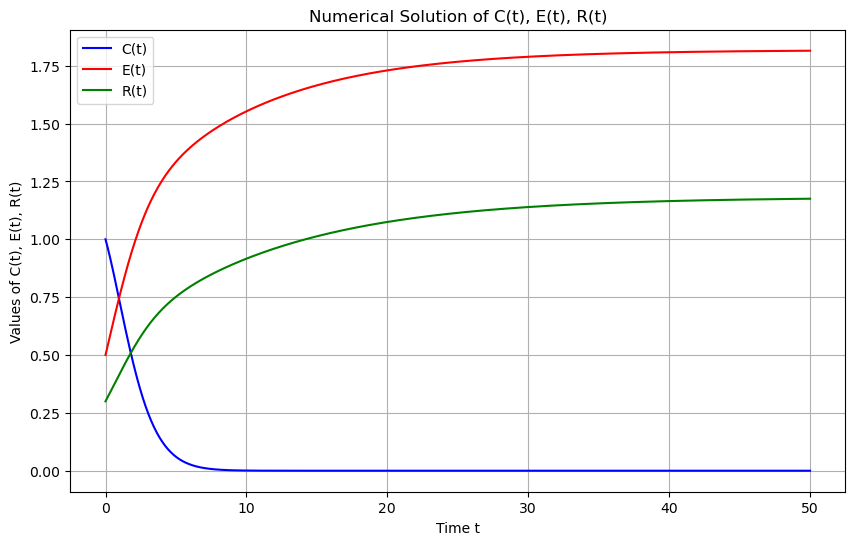

In [4]:
# 求解微分方程
sol = solve_ivp(system, t_span, y0, args=(a, b, n, theta1, theta2, beta1, beta2, 
                                          delta_E, delta_R, m, rho, gamma, S_E, S_R), t_eval=t_eval)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='C(t)', color='b')
plt.plot(sol.t, sol.y[1], label='E(t)', color='r')
plt.plot(sol.t, sol.y[2], label='R(t)', color='g')
plt.xlabel('Time t')
plt.ylabel('Values of C(t), E(t), R(t)')
plt.title('Numerical Solution of C(t), E(t), R(t)')
plt.legend()
plt.grid(True)
plt.show()

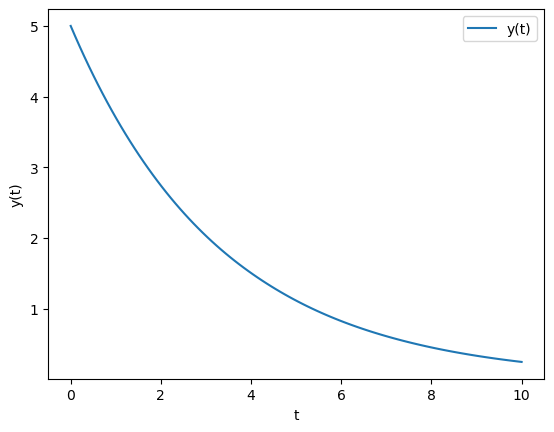

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 定义微分方程
def model(t, y):
    k = 0.3
    dydt = -k * y
    return dydt

# 初始条件，确保它是一维数组
y0 = [5]

# 时间区间
t_span = (0, 10)

# 求解微分方程
sol = solve_ivp(model, t_span, y0, t_eval=np.linspace(0, 10, 100))

# 绘制结果
plt.plot(sol.t, sol.y[0], label='y(t)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

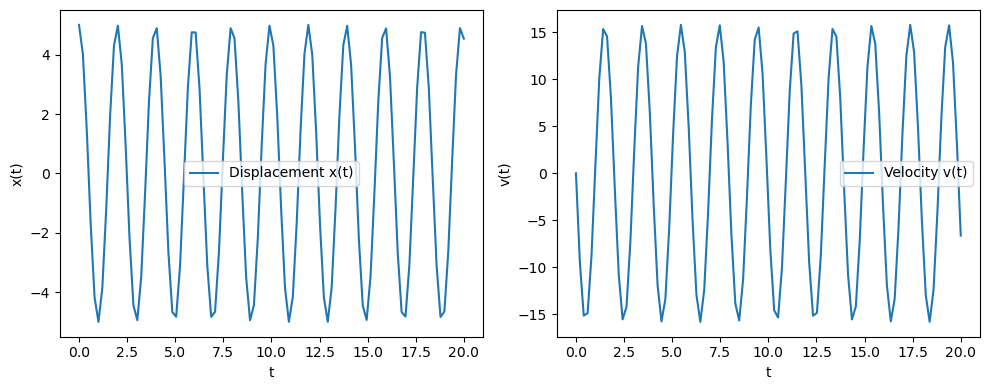

In [12]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 定义微分方程组
def spring_mass_system(t, y, k, m):
    x, v = y
    dxdt = v
    dvdt = -k/m * x
    return [dxdt, dvdt]

# 弹簧常数和质量
k = 10  # 弹簧常数
m = 1   # 质量

# 初始条件：初始位移为5单位，初始速度为0
y0 = [5, 0]

# 时间区间
t_span = (0, 20)

# 求解微分方程组
sol = solve_ivp(spring_mass_system, t_span, y0, args=(k, m), t_eval=np.linspace(0, 20, 100))

# 绘制位移和速度随时间变化的图像
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], label='Displacement x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[1], label='Velocity v(t)')
plt.xlabel('t')
plt.ylabel('v(t)')
plt.legend()

plt.tight_layout()
plt.show()

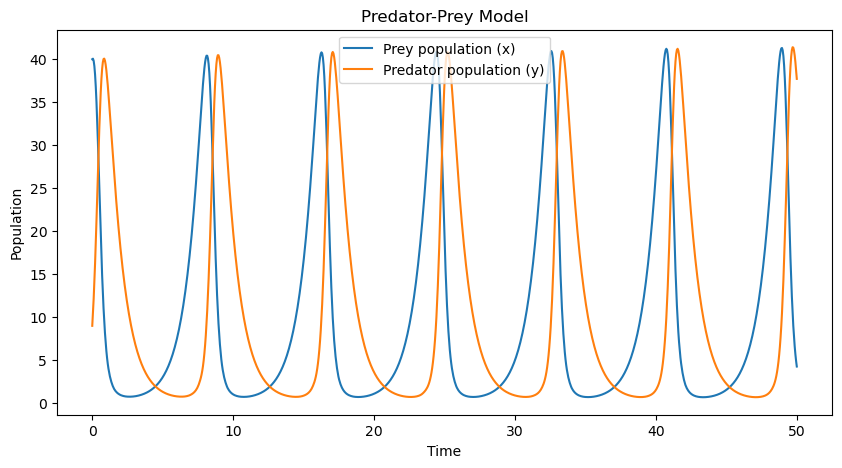

In [13]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 定义微分方程组
def predator_prey_system(t, y, alpha, beta, gamma, delta):
    x, y = y
    dxdt = alpha * x - beta * x * y
    dydt = -gamma * y + delta * x * y
    return [dxdt, dydt]

# 参数
alpha = 1.0  # 猎物的自然增长率
beta = 0.1   # 捕食者对猎物的捕食率
gamma = 1.0  # 捕食者的自然死亡率
delta = 0.1  # 将捕食的猎物转化为捕食者后代的效率

# 初始条件：初始猎物种群为40，初始捕食者种群为9
y0 = [40, 9]

# 时间区间
t_span = (0, 50)

# 求解微分方程组
sol = solve_ivp(predator_prey_system, t_span, y0, args=(alpha, beta, gamma, delta), t_eval=np.linspace(0, 50, 1000))

# 绘制猎物和捕食者的种群随时间变化的图像
plt.figure(figsize=(10, 5))

plt.plot(sol.t, sol.y[0], label='Prey population (x)')
plt.plot(sol.t, sol.y[1], label='Predator population (y)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator-Prey Model')
plt.legend()
plt.show()